# **Tugas Praktikum 2**
---

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

### **Langkah 1 - Import Library**

In [15]:
import cv2
import numpy as np
from pathlib import Path
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### **Langkah 2 - Memuat Data dan Pra-Pemrosesan Data**

In [2]:
# Image directories
train_dir = "data/images/images/training/"
test_dir = "data/images/images/test/"

In [3]:
def load_images(img_dir):
    img_list = []
    p = Path(img_dir)
    dirs = p.glob('*')
    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = cv2.imread(str(file))
            if img is not None:
                img_resized = cv2.resize(img, (1100, 600))  # Ubah ukuran menjadi standar
                img_list.append((img_resized, label))
    return img_list


In [4]:
train_img = load_images(train_dir)
test_img = load_images(test_dir)

### **Langkah 3 - Ekstraksi Fitur Histogram**

In [5]:
def extract_histogram(image):
    # Hitung histogram untuk setiap saluran
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    
    # Normalisasi histogram
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()
    
    # Gabungkan histogram
    hist = np.concatenate([hist_r, hist_g, hist_b])
    return hist

In [6]:
# Ekstraksi fitur histogram untuk semua gambar
def extract_features(img_list):
    features = []
    labels = []
    for img, label in img_list:
        hist = extract_histogram(img)
        features.append(hist)
        labels.append(1 if label == 'day' else 0)  # Encode label: siang=1, malam=0
    return np.array(features), np.array(labels)

In [7]:
X_train, y_train = extract_features(train_img)
X_test, y_test = extract_features(test_img)

### **Langkah 4 - Melatih SVM**

In [30]:
# Melatih model SVM
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [31]:
# Lakukan prediksi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### **Langkah 5 - Evaluasi Model**

In [32]:
# Evaluasi performa
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [36]:
print(f"Akurasi Training: {train_acc}")
print(f"Akurasi Testing: {test_acc}")
print("Classification Report : ")
print(classification_report(y_test, y_test_pred, target_names=["Day", "Night"]))

Akurasi Training: 1.0
Akurasi Testing: 0.975
Classification Report : 
              precision    recall  f1-score   support

         Day       0.97      0.97      0.97        80
       Night       0.97      0.97      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



### **Tampilan Histogram**

In [34]:
def plot_histogram(image):
    colors = ('b', 'g', 'r')  # Urutan saluran warna
    plt.figure(figsize=(10, 5))
    
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    
    plt.title('Histogram of RGB Channels')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

Ambil gambar acak untuk di cek histogram nya

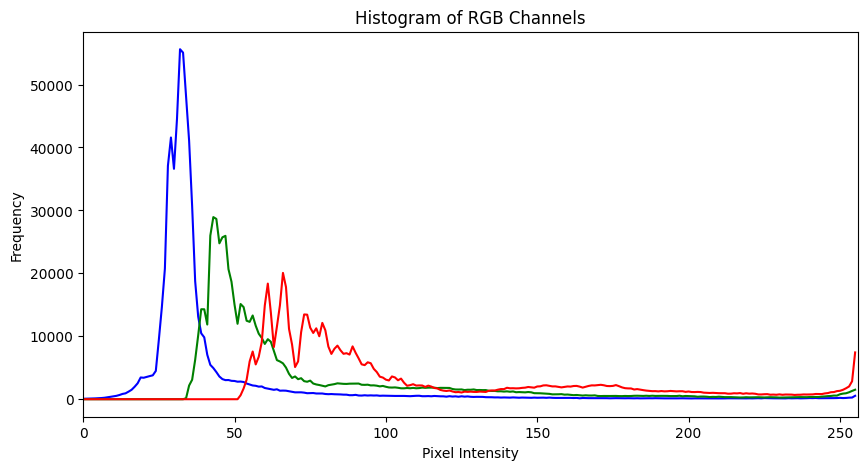

In [35]:
random_image = train_img[np.random.randint(0, len(train_img))][0]  # Ambil gambar acak
plot_histogram(random_image)